### Approach-1
Here I used normal CNN to predict the non-zero coordinates.

In [1]:
# import required libraries
import pathlib
import yaml
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models 
from src.data.make_dataset import make_dataset


In [2]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2)) 

# Compile the model
model.compile(
    optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"]
)

In [3]:
# generate dataset
curr_dir = pathlib.Path.cwd()
home_dir = curr_dir.parent.as_posix()
params = yaml.safe_load(open(f"{home_dir}/params.yaml"))["make_dataset"]
x_train, y_train, x_test, y_test, x_val, y_val = make_dataset(
    params["train_size"],
    params["test_size"],
    params["val_size"],
    params["image_size"],
)

In [4]:
# fit the model on training data
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 617.4055 - mean_absolute_error: 20.7384 - val_loss: 246.3549 - val_mean_absolute_error: 13.5275
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 203.5728 - mean_absolute_error: 12.0305 - val_loss: 152.1621 - val_mean_absolute_error: 10.1316
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 128.9580 - mean_absolute_error: 8.7436 - val_loss: 92.9817 - val_mean_absolute_error: 7.0544
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 83.9763 - mean_absolute_error: 6.7539 - val_loss: 69.9381 - val_mean_absolute_error: 5.9983
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 61.3454 - mean_absolute_error: 5.5465 - val_loss: 47.3538 - val_mean_absolute_error: 4.6883
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 36.0993 - mean_absolute_error: 4.0773 - val_loss: 33.5785 - val_mean_absolute_error: 3.7023
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 25.0726 - mean_absolute_er

In [33]:
# Evaluate the model
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)
print(f'Test MAE: {test_mae}')

10/10 - 0s - 12ms/step - loss: 0.9693 - mean_absolute_error: 0.6998
Test MAE: 0.6997554898262024


In [34]:
# Make predictions
predictions = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [35]:
# calculate the residual
x = y_test[:,0] - predictions[:,0]
y = y_test[:,1] - predictions[:,1]

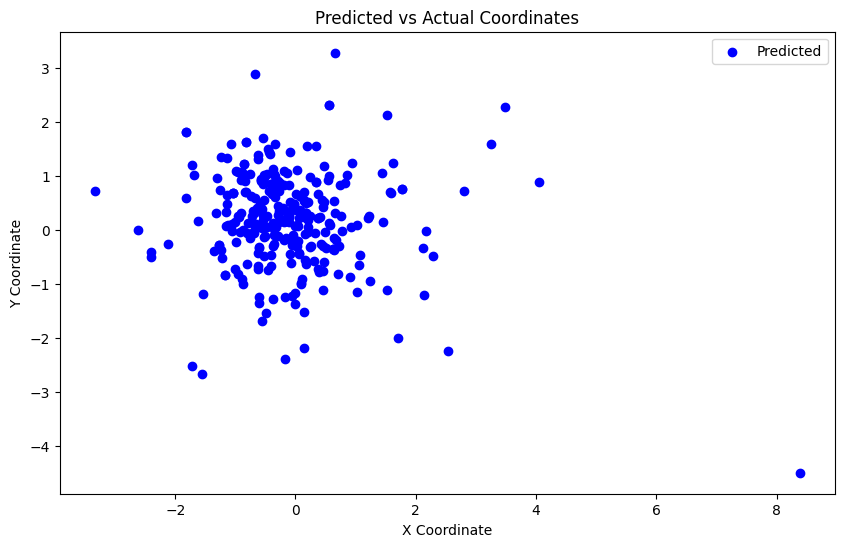

In [36]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Predicted')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Predicted vs Actual Coordinates')
plt.legend()
plt.show()